In [ ]:
# read raw  EEG data  and viuslize

In [1]:
import mne
import numpy as np
import matplotlib as mp
import pandas as pd
from mne import Epochs, pick_types, events_from_annotations
from mne.channels import read_layout
from mne.preprocessing import ICA
subject=np.arange(0,10)
trails=np.arange(0,1)

In [2]:
# read dat to df 
import re
data=pd.read_csv('dataeeg.txt',header=None)
data=data.rename(columns={20: 'time',21:'abstime'})
a=data.iloc[:,1:17].mean()
data.iloc[:,1:17]=data.iloc[:,1:17]-data.iloc[:,1:17].mean()
b=data.iloc[:,1:17].mean()
#m=a.mean()
print(a,b)

#data.tail()
val=data.iloc[1,20]
data["stim"]=0
data['MI']=0

#def convtimetoint(val):
#    import re
#    valist=re.split(':',val)
#    return [int(valist[0]),int(valist[1]),int(float(valist[2]))]
#hr,mins,sec=convtimetoint(val)

#data.tail()

1       346.266098
2      8885.474920
3    -45158.866944
4    -52904.014578
5    -65561.468622
6    -38754.779865
7    -16022.883406
8     22978.306453
9    -11922.216014
10   -18899.846091
11   -38320.036495
12   -33576.553336
13     -262.533312
14   -21295.827756
15    -2500.514347
16   -25059.707971
dtype: float64 1    -1.544247e-10
2     1.797056e-10
3     1.765952e-09
4     1.352433e-09
5     3.729641e-09
6     1.874588e-09
7     7.620557e-10
8    -6.810130e-10
9     9.802008e-11
10    5.389477e-10
11    1.187869e-09
12    1.893385e-10
13    3.053578e-11
14    2.915401e-10
15    2.866805e-10
16    3.498655e-10
dtype: float64


In [3]:
#Pre Stimulation MI

pre_MI =np.array([['13:34:02','13:35:00'],
['13:35:21','13:36:00'],
['13:36:20','13:37:00'],
['13:37:20','13:38:00'],
['13:38:15','13:38:51']])



#During Stimulation MI

during_MI =np.array([['13:39:20','13:40:00'],
['13:40:20','13:41:00'],
['13:41:20','13:42:00'],
['13:42:21','13:43:00'],
['13:43:15','13:43:52']])


#Post Stimulation MI

post_MI =np.array([['13:44:20','13:45:00'],
['13:45:20','13:46:00'],
['13:46:20','13:47:01'],
['13:47:20','13:47:59'],
['13:48:15','13:48:50']])

print(type(pre_MI))
print(pre_MI.shape)
print(pre_MI[2][1])
print(len(pre_MI))

<class 'numpy.ndarray'>
(5, 2)
13:37:00
5


In [196]:

     
def gettimeframe(a,dataframe):
    xx=(dataframe[dataframe.time.str.contains(a[0],case=False)]).index[0]
    yy=(dataframe[dataframe.time.str.contains(a[1],case=False)]).index[0]
    return data.iloc[xx:yy+1,:],xx,yy+1
preindex_array=np.zeros(shape=pre_MI.shape)
preMI=np.zeros([5,16,1280])
prerest=np.zeros([5,16,1280])
for i in range(0,len(pre_MI)):
    #print(pre_MI[i])
    frame,startindex,endindex=gettimeframe(pre_MI[i],data)
    data.loc[startindex:endindex,'MI']=1
    preindex_array[i]=[startindex,endindex]
    preMI[i,:,:]=np.array(data.iloc[endindex+(3*128):endindex+(13*128),1:17]).T
    prerest[i,:,:]=np.array(data.iloc[startindex+(5*128):startindex+(15*128),1:17]).T #use only 0-3 of prerest
    newframe=data.iloc[range(startindex,endindex)]
    #print(newframe.head)
     # lets make data frame of MI


print(preindex_array)
print(preMI.shape)
print(preMI[1,10,:])

for i in range(0,3):
    A=preMI[i,:,:]
    B=preMI[i+1,:,:]
    C=prerest[i,:,:]
    D=prerest[i+1,:,:]
    MI1_MI2 = np.corrcoef(A.ravel(), B.ravel())
    rest1_rest2 = np.corrcoef(C.ravel(), D.ravel())
    MI1_rest1 = np.corrcoef(A.ravel(), C.ravel())
    print('Correlation between A and B:', MI1_MI2[0,1])
    print('Correlation between C and D:', rest1_rest2[0,1])
    print('Correlation between A and C:', MI1_rest1[0,1])
    print(i)

#CC_AC = np.corrcoef(A.ravel(), C.ravel())

#print('Correlation between A and C:', CC_AC[0, 1])



[[ 4448. 11723.]
 [14367. 19238.]
 [21762. 26753.]
 [29217. 34268.]
 [36131. 40640.]]
(5, 16, 1280)
[12495.32649526 13134.91649526 12937.66649526 ... 12387.90649526
 12087.87649526 12755.96649526]
Correlation between A and B: 0.9800069307626758
Correlation between C and D: 0.9712744118252435
Correlation between A and C: 0.9786157763455342
0
Correlation between A and B: 0.9608691995618398
Correlation between C and D: 0.9739972934186827
Correlation between A and C: 0.9827471426135145
1
Correlation between A and B: 0.9045681633333023
Correlation between C and D: 0.9640140452432794
Correlation between A and C: 0.9765346892157271
2


In [168]:
durindex_array =np.zeros(shape=during_MI.shape)
duringMI =np.zeros([5,16,1280])
duringrest=np.zeros([5,16,1280])

for i in range(0,len(during_MI)):
    #print(pre_MI[i])
    frame,startindex,endindex=gettimeframe(during_MI[i],data)
    data.loc[startindex:endindex,'MI']=1
    durindex_array[i]=[startindex,endindex]
    duringrest[i,:,:]=np.array(data.iloc[startindex+(5*128):startindex+(15*128),1:17]).T #use only 0-3 of prerest
    duringMI[i,:,:]=np.array(data.iloc[startindex+(5*128):startindex+(15*128),1:17]).T
    newframe=data.iloc[range(startindex,endindex)]
    #print(newframe.head)
     # lets make data frame of MI


print(durindex_array)
print(duringMI.shape)
print(duringMI[1,10,:])
A=duringMI[0,:,:]
B=duringMI[4,:,:]


MI1_MI2 = np.corrcoef(A.ravel(), B.ravel())
#CC_AC = np.corrcoef(A.ravel(), C.ravel())
print('Correlation between A and B:', MI1_MI2[0,1])
#print('Correlation between A and C:', CC_AC[0, 1])

    

[[44247. 49238.]
 [51762. 56753.]
 [59277. 64268.]
 [66912. 71783.]
 [73646. 78277.]]
(5, 16, 1920)
[-39749.29 -39455.14 -39536.26 ... -40031.55 -39859.57 -40195.43]
Correlation between A and B: 0.9904730015070224


In [170]:
postindex_array =np.zeros(shape=post_MI.shape)
postMI =np.zeros([5,16,1280])
postrest=np.zeros([5,16,1280])
for i in range(0,len(post_MI)):
    #print(pre_MI[i])
    frame,startindex,endindex=gettimeframe(post_MI[i],data)
    data.loc[startindex:endindex,'MI']=1
    postindex_array[i]=[startindex,endindex]
    postrest[i,:,:]=np.array(data.iloc[startindex+(5*128):startindex+(15*128),1:17]).T #use only 0-4 of prerest
    postMI[i,:,:]=np.array(data.iloc[startindex+(5*128):startindex+(15*128),1:17]).T
   # newframe=data.iloc[range(startindex,endindex)]
    #print(newframe.head())
print(postindex_array)
print(postMI.shape)
print(postMI[1,10,:])
A=postMI[0,:,:]
B=postMI[4,:,:]

MI1_MI2 = np.corrcoef(A.ravel(), B.ravel())
#CC_AC = np.corrcoef(A.ravel(), C.ravel())
print('Correlation between A and B:', MI1_MI2[0,1])
#print('Correlation between A and C:', CC_AC[0, 1])


[[ 81763.  86754.]
 [ 89278.  94269.]
 [ 96793. 101904.]
 [104308. 109179.]
 [111162. 115551.]]
(5, 16, 1920)
[-47646.3  -48181.75 -47813.31 ... -47860.02 -48288.15 -47760.96]
Correlation between A and B: 0.9964116580105703


In [176]:
A=postMI[1,:,:]
B=duringMI[3,:,:]


MI1_MI2 = np.corrcoef(A.ravel(), B.ravel())
#CC_AC = np.corrcoef(A.ravel(), C.ravel())
print('Correlation between A and B:', MI1_MI2[0,1])
#print('Correlation between A and C:', CC_AC[0, 1])

Correlation between A and B: 0.995539645719929


In [145]:
presti=['13:34:00','13:39:00']
duringsti=['13:39:01','13:44:00']
poststi=['13:44:01','13:49:00']


frame,startindex,endindex=gettimeframe(presti,data)
data.loc[startindex:endindex,'stim']=0
newframe=data.iloc[range(startindex,endindex)]
print(newframe.head)

frame,startindex,endindex=gettimeframe(duringsti,data)
data.loc[startindex:endindex,'stim']=1
newframe=data.iloc[range(startindex,endindex)]
print(newframe.head)


frame,startindex,endindex=gettimeframe(poststi,data)
data.loc[startindex:endindex,'stim']=2
newframe=data.iloc[range(startindex,endindex)]
print(newframe.head)





<bound method NDFrame.head of          0        1         2         3         4         5         6  \
4208   113  2358.44   9522.51 -25487.09 -47241.68 -61141.77 -33881.51   
4209   114  1801.15   8741.81 -22072.15 -47457.20 -61668.04 -34762.41   
4210   115  2315.31   9460.08 -25060.91 -47452.53 -61335.55 -34159.70   
4211   116  2071.81   9122.55 -23682.86 -47232.92 -61340.47 -34239.77   
4212   117  1974.62   8963.14 -22846.97 -47573.86 -61650.07 -34714.52   
...    ...      ...       ...       ...       ...       ...       ...   
41718  121  1884.52  11660.30 -43023.55 -50597.26 -62394.29 -36146.41   
41719  122  1889.55  11699.80 -43541.60 -50890.29 -62369.07 -36151.13   
41720  123  1874.04  11657.73 -43182.09 -50703.10 -62376.25 -36136.04   
41721  124  1896.72  11682.43 -43243.76 -50718.09 -62390.94 -36165.12   
41722  125  1874.53  11684.67 -43474.25 -50869.82 -62359.44 -36139.02   

              7         8         9  ...        14        15        16     17  \
4208   -9401

In [146]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,time,abstime,stim,MI
0,1,1269.15,8599.50,-21185.54,-47254.43,-62599.75,-32236.24,-11519.19,28467.81,-11567.52,...,-24700.40,-21830.90,-16543.64,0.000,0.000,0.000,13:33:26.528,1604910806528,0,0
1,2,686.76,7809.65,-17719.05,-47644.57,-63266.39,-33241.04,-7455.92,28443.18,-12568.39,...,-25014.71,-18475.06,-16801.38,0.000,0.000,0.000,13:33:26.528,1604910806528,0,0
2,3,1448.71,8827.15,-21847.55,-47443.61,-62590.07,-32235.08,-10574.43,28325.45,-12170.46,...,-24730.71,-24095.36,-16728.07,0.000,0.000,0.000,13:33:26.528,1604910806528,0,0
3,4,813.67,8001.77,-18743.95,-47375.57,-63001.03,-32840.07,-9666.86,28543.54,-11779.30,...,-24880.08,-18234.08,-16591.30,0.164,0.738,0.134,13:33:26.529,1604910806529,0,0
4,5,1094.92,8350.37,-19721.68,-47690.39,-63007.20,-32860.33,-8029.44,28306.76,-12801.56,...,-24913.39,-22210.91,-16892.96,0.000,0.000,0.000,13:33:26.529,1604910806529,0,0


In [103]:
#data.to_csv(r'c:\pandas.csv', header=None, index=None, sep=' ', mode='a')
data.to_excel(r'c:\label.xlsx', index = False)

In [4]:

dataTypeSeries = data.dtypes
import time
print(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(1604911740)))

#df1=data[data['abstime']==1604911740828]
#df1.head()
#print(dataTypeSeries)
#print(val)
#print(val[:6])


2020-11-09 13:49:00


[[1269.15 686.76 1448.71 ... -5249.13 -5230.55 -5257.64]
 [8599.5 7809.65 8827.15 ... 1906.6 1898.09 1879.0]] (12, 116933)


In [53]:
# seperate pre during and post simulation data

def pickdata(alldata,fs,starttime,endtime):
    return alldata.loc[:,starttime:(endtime*fs)]
fs=128 #samplint rate
starttime=0  #time in sec
endtime=9# time in sec
rawdata=data.T
pickdata(rawdata,fs,startime,endtime)


,0,1,2,3,4,5,6,7,8,9,...,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152
0,1,2,3,4,5,6,7,8,9,10,...,120,121,122,123,124,125,126,127,0,1
1,1269.15,686.76,1448.71,813.67,1094.92,1266.92,671.47,1466.52,810.74,1115.02,...,1799.54,1143.65,1699.45,1480.87,1274.59,1790.06,1127.6,1722.81,1484.74,1263.25
2,8599.5,7809.65,8827.15,8001.77,8350.37,8613.56,7814.93,8857.12,8005.17,8380.38,...,9173.18,8295.6,9026.95,8766.09,8448.65,9176.58,8286.15,9060.68,8751.07,8435.66
3,-21185.5,-17719,-21847.5,-18744,-19721.7,-21157.4,-17734.2,-21876.1,-18696.4,-19775.5,...,-22713.1,-19105.4,-21828.2,-21042.3,-19527.5,-22706.2,-19073.7,-21924.7,-21022.5,-19510.7
4,-47254.4,-47644.6,-47443.6,-47375.6,-47690.4,-47247.9,-47652.4,-47425.1,-47384,-47700,...,-47275.2,-47386.1,-47515.9,-47216.3,-47595.6,-47284.4,-47411.6,-47509.9,-47203.7,-47602.1
5,-62599.8,-63266.4,-62590.1,-63001,-63007.2,-62592.5,-63276.3,-62565,-62999.2,-63004.3,...,-61981.9,-62571.7,-62221.5,-62194.3,-62607,-61974.8,-62612.2,-62206.4,-62191.7,-62618.1
6,-32236.2,-33241,-32235.1,-32840.1,-32860.3,-32244.4,-33252.8,-32209.7,-32845.7,-32852.1,...,-33002,-33839.3,-33358,-33294.2,-33914.6,-32992.5,-33880.6,-33347.7,-33299.2,-33934.3
7,-11519.2,-7455.92,-10574.4,-9666.86,-8029.44,-11521.2,-7426.84,-10643.3,-9616.19,-8050.41,...,-10529.2,-7870.79,-8517.2,-10055,-6856,-10522.7,-7798.55,-8628.13,-10086.1,-6833.84
8,28467.8,28443.2,28325.5,28543.5,28306.8,28475.4,28441.8,28322.4,28547.8,28310.1,...,28501.3,28603.6,28389,28627.2,28450.3,28501.6,28609.3,28383,28632.5,28450.1
9,-11567.5,-12568.4,-12170.5,-11779.3,-12801.6,-11566.7,-12591.6,-12156.1,-11783.8,-12784.3,...,-11808.6,-12115.8,-12455,-11568.2,-12691.9,-11798.9,-12130.1,-12421.8,-11562.2,-12682.2


In [137]:
print(data.tail())

         0        1        2         3         4         5         6  \
116928  67 -5248.39  1900.93 -57887.26 -60837.76 -73719.41 -46008.52   
116929  68 -5242.98  1877.39 -57631.91 -60705.12 -73697.92 -46042.00   
116930  69 -5249.13  1906.60 -57970.19 -60901.28 -73738.60 -46012.11   
116931  70 -5230.55  1898.09 -57663.07 -60708.52 -73682.75 -46005.07   
116932  71 -5257.64  1879.00 -57856.39 -60825.89 -73741.02 -46038.67   

               7         8         9  ...        14       15        16     17  \
116928 -31919.88  13587.80 -12263.33  ... -23734.24  2102.47 -33299.61  0.000   
116929 -31649.64  13379.35 -12405.82  ... -23803.78  2233.16 -33323.39  0.000   
116930 -31875.31  13533.00 -12397.62  ... -23745.38  1941.29 -33238.16  0.134   
116931 -31789.92  13488.54 -12261.61  ... -23734.11  2283.50 -33346.28  0.000   
116932 -31701.48  13412.50 -12504.71  ... -23810.02  2025.31 -33251.50  0.000   

           18     19           time        abstime  stim  MI  
116928  0.000  0.

In [123]:
data=np.array(data)
data.shape
data_16=(data[:,1:17]).T
#data_12=data_12.reshape(1,12,116933)
print(data_16[:2,:])
#data_16.shape

[[1269.15 686.76 1448.71 ... -5249.13 -5230.55 -5257.64]
 [8599.5 7809.65 8827.15 ... 1906.6 1898.09 1879.0]]


In [138]:

sfreq = 128  # Sampling frequency
        #imes=np.arange(0, 3279/128, 1/128)
        
ch_types = ['eeg', 'eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg']
ch_names = ['Fp1','Fp2','C3','C4','T5','T6','O1','O2','F7','F8','F3','F4','T3','T4','P3','P4']
        
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(data_16, info)

# Scaling of the figure.
# For actual EEG/MEG data different scaling factors should be used.




# It is also possible to auto-compute scalings
scalings = 'auto'  # Could also pass a dictionary with some value == 'auto'
raw.plot(n_channels=12, scalings='auto', title='Auto-scaled Data from arrays',
         show=True, block=True)


Creating RawArray with float64 data, n_channels=16, n_times=116933
    Range : 0 ... 116932 =      0.000 ...   913.531 secs
Ready.


<Figure size 640x480 with 4 Axes>

<Figure size 640x480 with 4 Axes>

Effective window size : 16.000 (s)


<ipython-input-139-649d17dee7ec>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50)


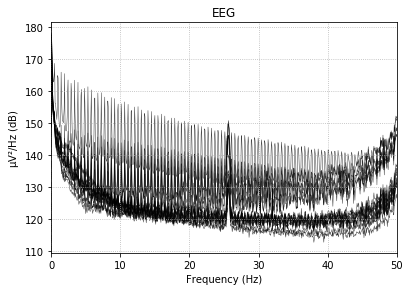

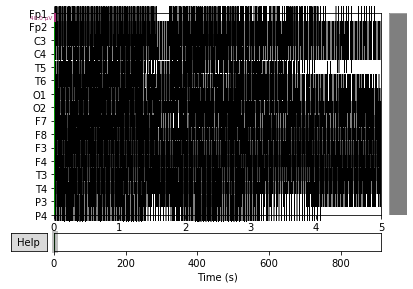

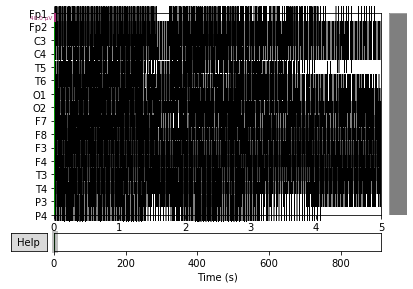

In [139]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=30)

In [ ]:
duration = 1.

# create a fixed size events array
# start=0 and stop=None by default
events = mne.make_fixed_length_events(raw, event_id, duration=duration)
print(events)

# for fixed size events no start time before and after event
tmin = 0.
tmax = 0.99  # inclusive tmax, 1 second epochs

# create :class:`Epochs <mne.Epochs>` object
epochs = mne.Epochs(raw, events=events, event_id=event_id, tmin=tmin,
                    tmax=tmax, baseline=None, verbose=True)
epochs.plot(scalings='auto', block=True)